C:\Users\karra\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')

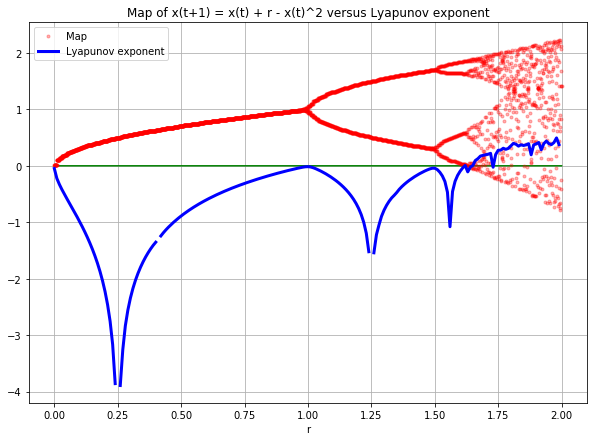

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# show plots in notebook
%matplotlib inline

result = []
lambdas = []
maps = []

# define range of r 
rvalues = np.arange(0, 2, 0.01)

def f(x, r):
    return x + r - x**2

# loop through r
for r in rvalues:
    x = 0.1
    result = []
    # iterate system 100 times
    for t in range(100):
        x = f(x, r)
        # calculate log of the absolute of the derivative
        result.append(np.log(abs(1 - 2*x)))
    # take average
    lambdas.append(np.mean(result))
    # for the map ignore first 100 iterations as transient time and iterate anew
    for t in range(20):
        x = f(x, r)
        maps.append(x)    

        
#plotting
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(1,1,1)

xticks = np.linspace(0, 2, 4000)
# zero line
zero = [0]*4000
ax1.plot(xticks, zero, 'g-')
# plot map
ax1.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Map')
ax1.set_xlabel('r')
# plot lyapunov
ax1.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
ax1.grid('on')
ax1.set_xlabel('r')
ax1.legend(loc='best')
ax1.set_title('Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')